In [1]:
from alfabeto_data import dissertation_images as di
from Continuo.kmeans_inversion import k_means_data, silhouette_analysis, label_maker_alf
from alfabeto_code.AlfabetoConverter import AlfabetoSymbols
from alfabeto_sources import all_sources
from scipy.spatial.distance import euclidean

ready!


In [ ]:
silhouette_compare = {'bach': [], 'alfabeto': [], 'palestrina': [], 'zma': [], 'zmo': [], 'zso': []}
completeness_compare = {'bach': [], 'alfabeto': [], 'palestrina': [], 'zma': [], 'zmo': [], 'zso': []}


for x in range(2, 13):
    silhouette_compare['bach'].append(di.k_means_simple(di.bach_notes_data[0], 
                                                        x, di.label_maker(di.bach_notes_data[1]))['silhouette'])
    silhouette_compare['alfabeto'].append(di.k_means_simple(di.alfabeto_notes_data[0], 
                                                        x, di.label_maker_alfabeto(di.alfabeto_notes_data[1]))['silhouette'])
    silhouette_compare['palestrina'].append(di.k_means_simple(di.palestrina_notes_data[0], 
                                                        x, di.label_maker_alfabeto(di.palestrina_notes_data[1]))['silhouette'])
    silhouette_compare['zma'].append(di.k_means_simple(di.zma_notes_data[0], 
                                                        x, di.label_maker_alfabeto(di.zma_notes_data[1]))['silhouette'])
    silhouette_compare['zmo'].append(di.k_means_simple(di.zmo_notes_data[0], 
                                                        x, di.label_maker_alfabeto(di.zmo_notes_data[1]))['silhouette'])
    silhouette_compare['zso'].append(di.k_means_simple(di.zso_notes_data[0], 
                                                        x, di.label_maker_alfabeto(di.zso_notes_data[1]))['silhouette'])
    
    completeness_compare['bach'].append(di.k_means_simple(di.bach_notes_data[0],
                                                        x, di.label_maker(di.bach_notes_data[1]))['completeness'])
    completeness_compare['alfabeto'].append(di.k_means_simple(di.alfabeto_notes_data[0],
                                                        x, di.label_maker_alfabeto(di.alfabeto_notes_data[1]))['completeness'])
    completeness_compare['palestrina'].append(di.k_means_simple(di.palestrina_notes_data[0],
                                                        x, di.label_maker_alfabeto(di.palestrina_notes_data[1]))['completeness'])
    completeness_compare['zma'].append(di.k_means_simple(di.zma_notes_data[0],
                                                        x, di.label_maker_alfabeto(di.zma_notes_data[1]))['completeness'])
    completeness_compare['zmo'].append(di.k_means_simple(di.zmo_notes_data[0],
                                                        x, di.label_maker_alfabeto(di.zmo_notes_data[1]))['completeness'])
    completeness_compare['zso'].append(di.k_means_simple(di.zso_notes_data[0],
                                                        x, di.label_maker_alfabeto(di.zso_notes_data[1]))['completeness'])

tuple_data = ([silhouette_compare['bach']+completeness_compare['bach'], 
               silhouette_compare['alfabeto']+completeness_compare['alfabeto'], 
               silhouette_compare['palestrina']+completeness_compare['palestrina'], 
               silhouette_compare['zma']+completeness_compare['zma'], 
               silhouette_compare['zmo']+completeness_compare['zmo'], 
               silhouette_compare['zso']+completeness_compare['zso']], 
              ['bach', 'alfabeto', 'palestrina', 'zma', 'zmo', 'zso'])

silhouette_neato = di.neato_maker(tuple_data)

In [ ]:
scaled_data = []
for x in silhouette_neato[0]:
    scaled_data.append([y/30 for y in x])

In [ ]:
di.neato_plain(scaled_data, ['$'+n+'$' for n in tuple_data[1]], 'neato_modes.pdf')

In [ ]:
di.victoria_masses_notes_data

In [ ]:
# di.liber_notes_data[0], ['$'+str(n)+'$' for n in di.liber_notes_data[1]], 48, 
#                        'liber_notes_score.pdf'
# di.k_means_data(scaled_data, 3, ['$'+n+'$' for n in tuple_data[1]], 'kmeans_modes.pdf')
di.fitness_plotter(di.monteverdi_notes_data[0], di.label_maker_alfabeto(di.monteverdi_notes_data[1]), 12, 'monteverdi_notes_score.pdf')
di.k_means_data(di.monteverdi_notes_data[0], 5, di.label_maker_alfabeto(di.monteverdi_notes_data[1]), 'monteverdi_notes.pdf')

In [ ]:
temp_zmo = di.temperley_appender(di.zmo_notes_data)
temperleymarvin_maj = [('$\hat{1}$', .223), 
                       ('$♯\hat{1}/♭\hat{2}$', .006), 
                       ('$\hat{2}$', .12), 
                       ('$♯\hat{2}/♭\hat{3}$', .003), 
                       ('$\hat{3}$', .154), 
                       ('$\hat{4}$', .109), 
                       ('$♯\hat{4}/♭\hat{5}$', .019), 
                       ('$\hat{5}$', .189), 
                       ('$♯\hat{5}/♭\hat{6}$', .007), 
                       ('$\hat{6}$', .076), 
                       ('$♯\hat{6}/♭\hat{7}$', .005), 
                       ('$\hat{7}$', .089)]

temperleymarvin_min = [('$\hat{1}$', .189), 
                       ('$♯\hat{1}/♭\hat{2}$', .006), 
                       ('$\hat{2}$', .126), 
                       ('$♯\hat{2}/♭\hat{3}$', .144), 
                       ('$\hat{3}$', .014), 
                       ('$\hat{4}$', .106), 
                       ('$♯\hat{4}/♭\hat{5}$', .021), 
                       ('$\hat{5}$', .211), 
                       ('$♯\hat{5}/♭\hat{6}$', .068), 
                       ('$\hat{6}$', .02), 
                       ('$♯\hat{6}/♭\hat{7}$', .023), 
                       ('$\hat{7}$', .073)]

# key_data_maj = [x[1]*100 for x in temperleymarvin_maj]
# key_data_min = [x[1]*100 for x in temperleymarvin_min]
# key_names = [x[0] for x in temperleymarvin_maj]
# plt.figure(figsize=(10,5))
# plt.plot(range(1, len(key_data)+1), key_data_maj, color='blue', linestyle='-', marker='o', label='major')
# plt.plot(range(1, len(key_data)+1), key_data_min, color='green', linestyle='-', marker='o', label='minor')
# plt.xticks(range(1, len(key_data)+2), key_names, rotation=0, fontsize=12)
# plt.yticks(fontsize=12)

# legend = plt.legend(loc='upper right', shadow=True, fontsize='large')
# legend.get_frame().set_facecolor('#00FFCC')
# plt.xlabel('Scale Degrees', fontsize=14)
# plt.ylabel('Frequency of Use', fontsize=14)
# plt.title('Key Profiles from Temperley Marvin 2008', fontsize=18)
# plt.grid(True)
# plt.savefig('/home/daniel/Desktop/temperleymarvin.pdf', bbox_inches='tight')

In [ ]:
scale_degrees = []
for x in temperleymarvin_maj:
    scale_degrees.append(x[0])

In [ ]:
scale_degrees

In [ ]:
corpus = di.alfabeto_notes_data
name = 'alfabeto'

K = di.k_means_data(corpus[0], 2, di.label_maker_alfabeto(corpus[1]), 
#                     'C:/Users/Daniel/Desktop/kmeans/%s_notes.svg' % name)
                    '/home/daniel/Desktop/%s.pdf' % name)
# di.fitness_plotter(corpus[0], di.label_maker_alfabeto(corpus[1]), 12, 
#                 '/home/daniel/Dropbox/Apps/ShareLaTeX/DissertationFinal/figures/kmeans/%s_notes_score.pdf' % name)
# # print(K.labels_)
# # print(di.zma_notes_data[1])

In [ ]:
def centroid_modes(corpus, corpus_name, number_of_modes, tonality):
    if tonality == 'modal':
        K = di.k_means_data(corpus[0], number_of_modes, di.label_maker_alfabeto(corpus[1]), 
                            '%s.pdf' % corpus_name)
        C = di.k_means_simple(corpus[0], number_of_modes, di.label_maker_alfabeto(corpus[1]))
        di.fitness_plotter_big(corpus[0], di.label_maker_alfabeto(corpus[1]), 12, 
                               '%s_notes_score.pdf' % corpus_name)
    elif tonality == 'tonal':
        K = di.k_means_data(corpus[0], number_of_modes, di.label_maker(corpus[1]), 
                            '%s.pdf' % corpus_name)
        C = di.k_means_simple(corpus[0], number_of_modes, di.label_maker(corpus[1]))
        di.fitness_plotter_big(corpus[0], di.label_maker(corpus[1]), 12, 
                               '%s_notes_score.pdf' % corpus_name)
    elif tonality == 'liber':
        K = di.k_means_data(corpus[0], number_of_modes, ['$'+str(n)+'$' for n in corpus[1]], 
                            '%s.pdf' % corpus_name)
        C = di.k_means_simple(corpus[0], number_of_modes, ['$'+str(n)+'$' for n in corpus[1]])
        di.fitness_plotter_big(corpus[0], ['$'+str(n)+'$' for n in corpus[1]], 12, 
                               '%s_notes_score.pdf' % corpus_name)
    elif tonality == 'fixed':
        K = di.k_means_data(corpus[0], number_of_modes, corpus[1], 
                            '%s.pdf' % corpus_name)
        C = di.k_means_simple(corpus[0], number_of_modes, corpus[1])
        di.fitness_plotter_big(corpus[0], corpus[1], 12, 
                               '%s_notes_score.pdf' % corpus_name)
    mode_labels = {'Ionian':[0, 2, 4, 5, 7, 9, 11],
               'Dorian':[0, 2, 3, 5, 7, 9, 10],
               'Phrygian':[0, 1, 3, 5, 7, 8, 10],
               'Lydian':[0, 2, 4, 6, 7, 9, 11],
               'Mixolydian':[0, 2, 4, 5, 7, 9, 10],
               'Aeolian':[0, 2, 3, 5, 7, 8, 10],
               'Harmonic minor':[0, 2, 3, 5, 7, 8, 11],
               'Melodic minor':[0, 2, 3, 5, 7, 9, 11],}
    
    cc = C['kmeans'].cluster_centers_
    for x in range(len(cc)):
        print(x, cc[x])
    l = C['kmeans'].labels_
    CC_final = []
    centroid_possible = {}
    for x, y in zip(K.labels_, l):
        if (x, y) in centroid_possible:
            centroid_possible[(x, y)]+=1
        else:
            centroid_possible[(x, y)] = 1
    print("centroid possible", centroid_possible)
    change_dict = {}
    
    top_centroids = []
    for y in centroid_possible.values():
        top_centroids.append(y)
    top_centroids = sorted(top_centroids, reverse=True)
    for x, y in centroid_possible.items():
        for a in top_centroids:
            if a == y:
                if x[0] not in change_dict.keys() and x[1] not in change_dict.values():
                    change_dict[x[0]] = x[1]
    print("change dict", change_dict)
#     for x, y in zip(K.labels_, l):
#         if x not in change_dict:
#             print(x, 'not in ', change_dict, y)
#             change_dict[x] = y
#     print('change dict', change_dict)
    for x in range(number_of_modes):
        CC_final.append(cc[change_dict[x]])
    print('cc_final',CC_final)
    for k in range(number_of_modes):
        top7 = sorted(CC_final[k],reverse=True)[0:7]
#         print(top7)
        scale = []
        for pc in CC_final[k]:
            if pc in top7:
                scale.append(list(CC_final[k]).index(pc))
        for a, j in mode_labels.items():
            if scale == j:
                print(str(k+1)+':', a, CC_final[k])

def centroid_modes_continuo(bass_harmonization, corpus_name, number_of_modes, path): #for the bass harmonization data
    import numpy as np
    import csv
    K = di.k_means_data(bass_harmonization[0], number_of_modes, bass_harmonization[1], 
                        path+'%s_continuo.pdf' % corpus_name)
    C = di.k_means_simple(bass_harmonization[0], number_of_modes, bass_harmonization[1])
    di.fitness_plotter_big(bass_harmonization[0], bass_harmonization[1], 12,
                           path+'%s_continuo_score.pdf' % corpus_name)
    cc = C['kmeans'].cluster_centers_
    l = C['kmeans'].labels_
    CC_final = []
    change_dict = {}
    for x, y in zip(K.labels_, l):
        if x not in change_dict:
            change_dict[x] = y
    for x in range(number_of_modes):
        CC_final.append(cc[change_dict[x]])
    
    def csv_function(f_variable, path):
        with open(path, 'w', newline='') as fp:
            a = csv.writer(fp, delimiter='&')
            a.writerows(f_variable)
    def chunks(l, n):
        """Yield successive n-sized chunks from l."""
        uberlist = []
        for i in range(0, len(l), n):
            uberlist.append(l[i:i + n])
        return np.around(uberlist, decimals=1)
    print(CC_final)
    for x in range(len(CC_final)):
        csv_ready = list(CC_final[x])
#         csv_function(csv_ready,
        csv_function(chunks(csv_ready, 12), 
                     path+'%s%s_octave.csv' % (corpus_name, (x+1)))
#     csv_function(CC_final, '/home/daniel/Dropbox/Apps/ShareLaTeX/DissertationFinal/figures/kmeans/continuo/%s_octave.csv' % corpus_name)
#     print(CC_final)
    return CC_final

def chord_frequency(corpus_list):
    all_chords = []
    all_labels =  label_maker_alf(corpus_list)
    for x in corpus_list:
        for y in x.values():
            alf_label_dict = {}
            for a in AlfabetoSymbols:
                alf_label_dict[a] = 0
            chord_number = 0
            temp_chords = []
            for z in y['alfabeto']:
                if z in AlfabetoSymbols:
                    alf_label_dict[z] += 1
                    chord_number += 1
            for x in range(len(AlfabetoSymbols)):
                temp_chords.append(alf_label_dict[AlfabetoSymbols[x]]/chord_number*100)
            all_chords.append(temp_chords)
    return all_chords, all_labels

In [ ]:
di.victoria_notes_data[0]

In [ ]:
# alf_letter = chord_frequency(all_sources.GetAll.all_alf)
# centroid_modes_continuo(alfcont, 'untransposed', 2, '/home/daniel/Desktop/')
centroid_modes(di.zso_notes_data, 'alfabeto', 4, 'modal')

In [ ]:
# alfcont = di.inversion_kmeans(di.GetAll.all_alf, 'all', di.label_maker_alfabeto)
# palcont = di.inversion_kmeans_corpus(di.palestrina_continuo, 'all', 'modal', di.label_maker_alfabeto)
# bachcont = di.inversion_kmeans_corpus(di.bach_continuo, 'all', 'tonal', di.label_maker)
# zma = di.inversion_kmeans_corpus(di.zma_continuo, 'all', 'modal', di.label_maker_alfabeto)
# zmo = di.inversion_kmeans_corpus(di.zmo_continuo, 'all', 'modal', di.label_maker_alfabeto)
# zso = di.inversion_kmeans_corpus(di.zso_continuo, 'all', 'modal', di.label_maker_alfabeto)
alfcont = di.inversion_kmeans_untransposed(di.GetAll.all_alf, 'all', di.label_maker_alfabeto)

# print(centroid_modes_continuo(palcont, 'palestrina', 2))



In [ ]:
di.neato_function_bigrams(di.bigram_graphs_alfabeto(di.GetAll.all_alf, di.modal_minor, 'continuo'), .02, 
                          '/home/daniel/Dropbox/Apps/ShareLaTeX/DissertationFinal/figures/function/alfabetobigramminor.pdf')

In [ ]:
centroid_modes_continuo(palcont, 'palestrina', 2)
centroid_modes_continuo(bachcont, 'bach', 2)
centroid_modes_continuo(zma, 'zma', 2)
centroid_modes_continuo(zmo, 'zmo', 2)
centroid_modes_continuo(zso, 'zso', 2)
centroid_modes_continuo(alfcont, 'alfabeto', 2)



In [ ]:
di.fitness_plotter_big(di.liber_notes_data[0], ['$'+str(n)+'$' for n in di.liber_notes_data[1]], 48, 
                       'liber_notes_score.pdf')
# centroid_modes(corpus, corpus_name, number_of_modes, tonality):
# centroid_modes(di.liber_notes_data, 'liber', 3, 'liber')

In [ ]:
chunks(list(p[0]), 12)

In [ ]:
mode_labels = {'ionian':[0, 2, 4, 5, 7, 9, 11],
               'dorian':[0, 2, 3, 5, 7, 9, 10],
               'phrygian':[0, 1, 3, 5, 7, 8, 10],
               'lydian':[0, 2, 4, 6, 7, 9, 11],
               'mixolydian':[0, 2, 4, 5, 7, 9, 10],
               'aeolian':[0, 2, 3, 5, 7, 8, 10],
               'harmonic minor':[0, 2, 3, 5, 7, 8, 11],
               'melodic minor':[0, 2, 3, 5, 7, 9, 11],}

In [ ]:
from scipy.spatial.distance import cdist

mode_names = []
mode_numbers = []

for a, j in mode_labels.items():
    mode_names.append(a)
    mode_numbers.append(j)
matrix = cdist(mode_numbers, mode_numbers, metric='hamming')

In [ ]:
lab = ['']+mode_names
matrixlab = []
for m, n in zip(mode_names, matrix):
    matrixlab.append([m]+list(n))

In [ ]:
f = [lab]+matrixlab
import csv
def csv_function(f_variable, path):
    with open(path, 'w', newline='') as fp:
        a = csv.writer(fp, delimiter=',')
        a.writerows(f_variable)
csv_function(f, '/home/daniel/Desktop/csv.csv')

In [ ]:
print(str(1)+'s')

In [ ]:
for x in cc[0]:
    print(x)

In [ ]:
e[2].index('I')

In [ ]:
e[1].index(31)

In [ ]:
s = []
starting = 0

for x in range(len(e[1])):
    length = e[1][x]
    print(starting, length)
    s.append(all_songs[starting:starting+length])
    starting += length

In [ ]:
di.monteverdi_notes_data[0][15]

In [ ]:
fixed_monteverdi_notes = []
fixed_monteverdi_labels = []
for x, y in zip(di.monteverdi_notes_data[0], di.label_maker_alfabeto(di.monteverdi_notes_data[1])):
    if y != 'o':
        fixed_monteverdi_notes.append(x)
        fixed_monteverdi_labels.append(y)

In [ ]:
len(fixed_monteverdi_notes)

In [ ]:
fixed_monteverdi = (fixed_monteverdi_notes, fixed_monteverdi_labels)

In [ ]:
a = [10, 33, 0, 1, 2, 3, 4, 5, 6, 7]
print(a[0:5])

In [ ]:
sorted(a, reverse=True)

In [ ]:
adict = {1:'a', 2:'b', 3:'c'}

In [ ]:
1 in adict.keys()

In [6]:
inertia = []
for x in range(2, 13):
    inertia.append(di.k_means_simple(di.bach_notes_data[0], x, di.label_maker(di.bach_notes_data[1]))['inertia'])

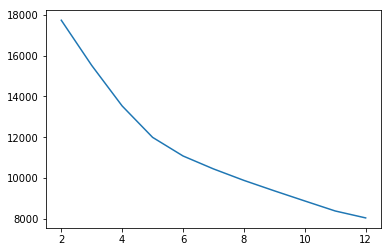

In [7]:
import matplotlib.pyplot as plt

plt.plot([x for x in range(2, 13)], inertia)